### These pre-processing codes are from:
    https://www.kaggle.com/ratthachat/aptos-eye-preprocessing-in-diabetic-retinopathy
    https://www.kaggle.com/titericz/circle-to-rectagle-preprocessing-1

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import cv2
%matplotlib inline

In [2]:
IMG_SIZE = 224

In [3]:
test_set=glob.glob("test/*")
train_set=glob.glob("train/*")
valid_set=glob.glob("valid/*")

In [4]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img
def morph_func( img, subgauss=False ):
    img = img.astype( np.uint8 )

    findblack = np.sum( img, axis=2 )
    findblack = findblack - np.min(findblack)
    findblack[findblack > np.mean(findblack)] = np.mean(findblack)
    findblack = findblack / np.max(findblack)
    borders = 2+np.sum( findblack[:,:int(img.shape[1]/2)]<0.33, axis=1 )

    for i in range( img.shape[0] ):
        k = borders[i]
        img[i] = img[i, np.linspace(k,img.shape[1]-k,num=img.shape[1]).astype(int),: ]   
        
    img = cv2.resize( img, (IMG_SIZE,IMG_SIZE) )
    if subgauss==True:
        img = cv2.addWeighted(img,4, cv2.GaussianBlur(img, (0,0) , sigmaX=13) ,-4 ,127)
        
    return img

In [5]:
# New one!!!
def img_processing(path, sigmaX=10):

    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = morph_func(image)
    image = cv2.addWeighted (image,4, cv2.GaussianBlur(image, (0,0) ,sigmaX), -4, 128)
    return image

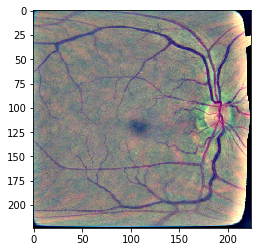

In [6]:
i=9
path=train_set[i]
img = img_processing(path)
plt.imshow(img)

In [7]:
# i=777
# path=train_set[i]
# img=cv2.imread(path)

In [8]:
img.max()

255

In [9]:
img.shape

(224, 224, 3)

In [10]:
for path in test_set:
    img = img_processing(path)
    path = os.path.join('preprocessed',path)
    cv2.imwrite(path, img)

In [11]:
for path in train_set:
    img = img_processing(path)
    path = os.path.join('preprocessed',path)
    cv2.imwrite(path, img)

In [12]:
for path in valid_set:
    img = img_processing(path)
    path = os.path.join('preprocessed',path)
    cv2.imwrite(path, img)